In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

2024-04-08 21:26:23.034829: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("../data/data-final.csv", delimiter="\t")
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
dff = df.iloc[:, 0:50]
dff.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null

In [5]:
# drop rows with missing values
dff = dff.dropna()
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013558 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null  flo

In [6]:
print(dff.values)

[[4. 1. 5. ... 3. 4. 5.]
 [3. 5. 3. ... 2. 5. 3.]
 [2. 3. 4. ... 3. 4. 4.]
 ...
 [4. 2. 4. ... 5. 4. 5.]
 [2. 4. 3. ... 5. 5. 3.]
 [4. 2. 4. ... 4. 5. 5.]]


In [7]:
X = dff.values

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
input_dim = X_scaled.shape[1]

In [10]:
input_dim

50

In [11]:
encoder = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation="relu", input_shape=(input_dim,)),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu"),
    ]
)

/Users/Cyrille/.local/share/virtualenvs/personality_test-oBsvmXLe/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
decoder = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(16, activation="relu", input_shape=(8,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(input_dim, activation="linear"),
    ]
)

In [13]:
autoencoder = tf.keras.Sequential([encoder, decoder])

In [14]:
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [15]:
autoencoder.fit(X_scaled, X_scaled, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5848 - val_loss: 0.4724
Epoch 2/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4820 - val_loss: 0.4662
Epoch 3/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4766 - val_loss: 0.4624
Epoch 4/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4739 - val_loss: 0.4602
Epoch 5/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4718 - val_loss: 0.4586
Epoch 6/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4705 - val_loss: 0.4582
Epoch 7/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4698 - val_loss: 0.4577
Epoch 8/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4693 - val_loss: 0.4573
Epoch 9/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4688 - val_loss: 0.4570
Epoch 10/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.4685 - val_loss: 0.4560


In [32]:
# create new data to test the autoencoder
#EXT1	EXT2	EXT3	EXT4	EXT5	EXT6	EXT7	EXT8	EXT9	EXT10	EST1	EST2	EST3	EST4	EST5	EST6	EST7	EST8	EST9	EST10	AGR1	AGR2	AGR3	AGR4	AGR5	AGR6	AGR7	AGR8	AGR9	AGR10	CSN1	CSN2	CSN3	CSN4	CSN5	CSN6	CSN7	CSN8	CSN9	CSN10	OPN1	OPN2	OPN3	OPN4	OPN5	OPN6	OPN7	OPN8	OPN9	OPN10
#4	1	5	2	5	1	5	2	4	1	1	4	4	2	2	2	2	2	3	2	2	5	2	4	2	3	2	4	3	4	3	4	3	2	2	4	4	2	4	4	5	1	4	1	4	1	5	3	4	5	9419	5491	3959	4821	5611	2756	2388	2113	5900	4110	6135	4150	5739	6364	3663	5070	5709	4285	2587	3997	4750	5475	11641	3115	3207	

# new_data = np.array([[1, 5, 2, 5, 1, 5, 2, 4, 1, 1, 4, 4, 2, 2, 2, 2, 2, 3, 2, 2, 5, 2, 4, 2, 3, 2, 4, 3, 4, 3, 4, 3, 2, 2, 4, 4, 2, 4, 4, 5, 1, 4, 1, 4, 1, 5, 3, 4, 5, 9419]]) 

new_data_scaled = scaler.transform(dff)

encoded_data = encoder.predict(new_data_scaled)

print(encoded_data)


    

/Users/Cyrille/.local/share/virtualenvs/personality_test-oBsvmXLe/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


31674/31674 ━━━━━━━━━━━━━━━━━━━━ 27s 856us/step
[[1.3402158 1.5874277 0.        ... 1.3370748 1.3045863 2.7354367]
 [1.513748  2.296343  0.        ... 2.7529352 1.1441725 1.2891754]
 [1.1358656 1.6203485 0.        ... 1.519167  0.9660436 1.2298619]
 ...
 [2.429103  1.5710917 0.        ... 1.4398062 2.5910723 2.968107 ]
 [1.8060464 2.361581  0.        ... 1.3969839 1.0743586 1.3358576]
 [1.7947906 1.418956  0.        ... 1.5263095 1.460384  2.3530862]]


In [33]:
print(encoded_data.shape)   

(1013558, 8)


In [44]:
from sklearn.cluster import KMeans
import numpy as np

k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(encoded_data)
labels = kmeans.labels_

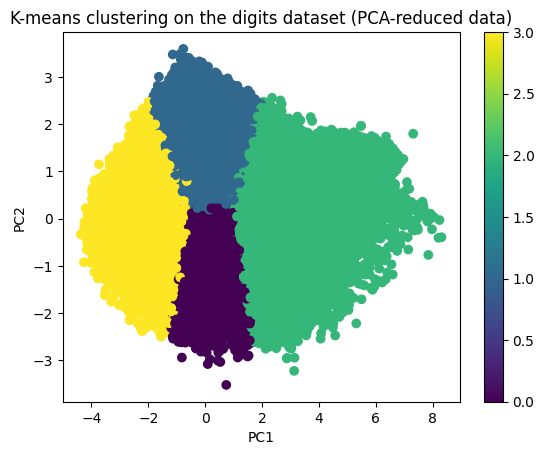

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means clustering on the digits dataset (PCA-reduced data)')
plt.colorbar()
plt.show()

In [48]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [49]:
# save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [51]:
#save the encoder
encoder.save("encoder_model.h5")

PicklingError: Can't pickle <function Layer._initializer_tracker.<locals>.<lambda> at 0x15837cfe0>: it's not found as keras.src.layers.layer.Layer._initializer_tracker.<locals>.<lambda>